In [225]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras

In [226]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [227]:

data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])
data.head()

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [228]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [229]:
data2['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'OTHER', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP'], dtype=object)

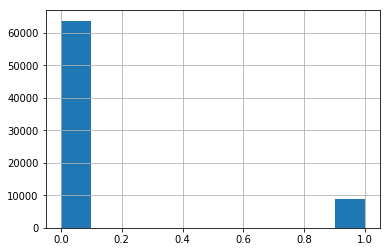

In [230]:
data2.IsBadBuy.hist()
plt.show()
#data2.Make.hist()
#data2.Make.value_counts().plot(kind='bar')
#plt.show()


In [259]:
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

In [261]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 25 columns):
IsBadBuy                             72658 non-null int64
Auction                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationality                          72658 non-null object
Size                                 72658 non-null object
TopThreeAmericanName                 72658 non-null object
MMRAcquisitionAuctionAveragePrice    72658 non-null object
MMRAcquisitionAuctionCleanPrice      72658 non-null object
MMRAcqu

In [239]:
data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 25 columns):
IsBadBuy                             72658 non-null int64
Auction                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationality                          72658 non-null object
Size                                 72658 non-null object
TopThreeAmericanName                 72658 non-null object
MMRAcquisitionAuctionAveragePrice    72658 non-null object
MMRAcquisitionAuctionCleanPrice      72658 non-null object
MMRAcqu

In [250]:
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
#X.head()
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Columns: 166 entries, IsBadBuy to WarrantyCost_OTHER
dtypes: int64(2), uint8(164)
memory usage: 13.0 MB


In [251]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)
X = np.array(X)
Y = np.array(Y)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, Y_train_ori, Y_test_ori = train_test_split(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)


Y_train_ori_onehot = np_utils.to_categorical(Y_train_ori)
Y_test_ori_onehot = np_utils.to_categorical(Y_test_ori)
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)



In [252]:
X_train_ori.shape

(54493, 165)

In [254]:
#acc = []

#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=370,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.3))


model.add(Dense(units=165,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.2))


model.add(Dense(units=45,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.6))



    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adam, metrics=['accuracy'])
train_history =model.fit(x=X_train_ori,
                         y=Y_train_ori_onehot,
                         validation_split=0.3, 
                         epochs=20,
                         batch_size=93,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test_ori, Y_test_ori_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

W0215 08:04:10.343319  5804 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 38145 samples, validate on 16348 samples
Epoch 1/20
 - 6s - loss: 0.4422 - acc: 0.8697 - val_loss: 0.3596 - val_acc: 0.8763
Epoch 2/20
 - 4s - loss: 0.3618 - acc: 0.8774 - val_loss: 0.3343 - val_acc: 0.8763
Epoch 3/20
 - 5s - loss: 0.3361 - acc: 0.8774 - val_loss: 0.3221 - val_acc: 0.8763
Epoch 4/20
 - 5s - loss: 0.3300 - acc: 0.8835 - val_loss: 0.3186 - val_acc: 0.8919
Epoch 5/20
 - 5s - loss: 0.3241 - acc: 0.8958 - val_loss: 0.3190 - val_acc: 0.8922
Epoch 6/20
 - 5s - loss: 0.3195 - acc: 0.8967 - val_loss: 0.3136 - val_acc: 0.8930
Epoch 7/20
 - 5s - loss: 0.3166 - acc: 0.8982 - val_loss: 0.3108 - val_acc: 0.8956
Epoch 8/20
 - 6s - loss: 0.3137 - acc: 0.8995 - val_loss: 0.3101 - val_acc: 0.8969
Epoch 9/20
 - 6s - loss: 0.3120 - acc: 0.9000 - val_loss: 0.3100 - val_acc: 0.8978
Epoch 10/20
 - 6s - loss: 0.3090 - acc: 0.9008 - val_loss: 0.3101 - val_acc: 0.8973
Epoch 11/20
 - 6s - loss: 0.3062 - acc: 0.9004 - val_loss: 0.3098 - val_acc: 0.8974
Epoch 12/20
 - 5s - loss: 0.3031 - 

In [ ]:
X_train, X_test, Y_train, Y_test

In [248]:
#acc = []
i = 260
#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=370,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.3))


model.add(Dense(units=165,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.2))


model.add(Dense(units=45,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.6))



    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
train_history =model.fit(x=X_train,
                         y=Y_train_onehot,
                         validation_split=0.3, 
                         epochs=1500,
                         batch_size=30,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test, Y_test_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

W0214 13:35:01.651357  5804 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Train on 38145 samples, validate on 16348 samples
Epoch 1/1500
 - 12s - loss: 0.3465 - acc: 0.8889 - val_loss: 0.3137 - val_acc: 0.9011
Epoch 2/1500
 - 9s - loss: 0.3219 - acc: 0.8941 - val_loss: 0.3109 - val_acc: 0.8999
Epoch 3/1500
 - 10s - loss: 0.3146 - acc: 0.8960 - val_loss: 0.3077 - val_acc: 0.9000
Epoch 4/1500
 - 10s - loss: 0.3090 - acc: 0.8970 - val_loss: 0.3133 - val_acc: 0.8986
Epoch 5/1500
 - 11s - loss: 0.3037 - acc: 0.8981 - val_loss: 0.3074 - val_acc: 0.8986
Epoch 6/1500
 - 10s - loss: 0.2965 - acc: 0.8986 - val_loss: 0.3188 - val_acc: 0.8993
Epoch 7/1500
 - 10s - loss: 0.2919 - acc: 0.8999 - val_loss: 0.3204 - val_acc: 0.8996
Epoch 8/1500
 - 10s - loss: 0.2837 - acc: 0.9016 - val_loss: 0.3282 - val_acc: 0.8990
Epoch 9/1500
 - 10s - loss: 0.2772 - acc: 0.9023 - val_loss: 0.3408 - val_acc: 0.9000
Epoch 10/1500
 - 11s - loss: 0.2716 - acc: 0.9040 - val_loss: 0.3390 - val_acc: 0.8962
Epoch 11/1500
 - 10s - loss: 0.2620 - acc: 0.9051 - val_loss: 0.3592 - val_acc: 0.8996
Epo

KeyboardInterrupt: 

In [ ]:
data2_cleaned.head()

In [ ]:
for i in range(len(dataFinal.columns)):
    print(dataFinal.columns[i])

In [ ]:
#dataFinal[dataFinal['Make_FORD']==1]

In [255]:
lr = LR(C=1.) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model


lr.score(X_test, Y_test) # prediction performance, accuracy
from sklearn.metrics import precision_score,recall_score


precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)
lr.classes_


0.7444279346210996
0.22436184505150022


array([0, 1], dtype=int64)

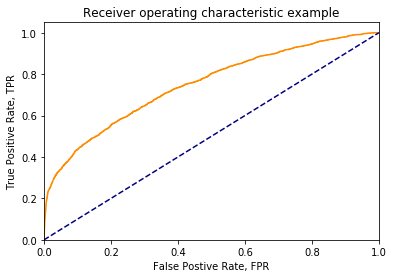

In [256]:

# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()